# UPC Quantum Engineering Final Project: Quantum Channel Discrimination
## II. One-shot discrimination

### A. Optimal Input

In [1]:
from itertools import product, combinations
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import Aer, execute
from numpy import pi
from mpl_toolkits.mplot3d import Axes3D
from math import e
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
# Create 2 qbits circuit and 1 output classical bit
qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(2, 'c')
creg_c = ClassicalRegister(1, 'c')
T = 10  # Points of Theta angle (pi) in Bloch sphere - min 2
P = 20  # Points of Phase angle (2*pi) in Bloch sphere - min 2
angle = pi/1.5  # Angle used for CY gate
cycles = 5000  # Number of iterations in execution

# Quantum states to pass through the circuit
# We want to pass the Bloch sphere through it to see visually the transformation
# First we generate the angles which will help the draw the sphere
Theta = np.mgrid[0:pi:T*1j]
Phase = np.mgrid[0:2*pi:P*1j]
# As we have to provide the state values to initialize the qreg[0] we have to do a conversion
# from angles in the sphere to statevector amplitudes. These statevectors will be the combination of
# Zero_Amplitude*|0> plus One_Amplitude*|1>
Zero_Amplitude = [0]*T*P
One_Amplitude = [0]*T*P
Zero_AmplitudeF = [0]*T*P
One_AmplitudeF = [0]*T*P


In [3]:
print('Preparing states to pass through the circuit')
for a in range(len(Theta)):
    for b in range(len(Phase)):
        Zero_Amplitude[a*P+b] = math.cos(Theta[a]/2)
        One_Amplitude[a*P+b] = math.sin(Theta[a]/2)*e**(1j*Phase[b])
# List of Initial States
#        print("State ", a*P+b," =", Zero_Amplitude[a*P+b],"*|0> + ", One_Amplitude[a*P+b], "*|1>")

# Use Aer's qasm_simulator
backend_sim = Aer.get_backend('qasm_simulator')

totalResults = []
totalCounts = []
totalCircuits = []

Preparing states to pass through the circuit


In [4]:
print("Defining the circuit")
# Create the circuit gates
# Not used as we defined the angle and don't iterate circuits
# print("Starting to compute the angle: ", math.degrees(theta))

# Initialize circuit with desired initial_state
print("Initializing the circuit")

for i in range(len(Zero_Amplitude)):
    circuit = QuantumCircuit(qreg_q, creg_c)
    circuit.initialize([Zero_Amplitude[i], One_Amplitude[i]], qreg_q[0])
    print("Input State ", i, " =",
          Zero_Amplitude[i], "*|0> + ", One_Amplitude[i], "*|1>")
    circuit.x(qreg_q[0])
    circuit.reset(qreg_q[1])
    circuit.cry(angle, qreg_q[0], qreg_q[1])
    circuit.cx(qreg_q[1], qreg_q[0])
    circuit.measure(qreg_q[0], creg_c[0])
    totalCircuits.append(circuit)
    job_sim = execute(circuit, backend_sim, shots=cycles)
    results_sim = job_sim.result()
    totalResults.append(results_sim)
    counts = results_sim.get_counts(circuit)
    Zero_AmplitudeF[i] = np.sqrt(counts['0']/cycles)
    One_AmplitudeF[i] = np.sqrt((cycles-counts['0'])/cycles)
    totalCounts.append(counts)

Defining the circuit
Initializing the circuit
Input State  0  = 1.0 *|0> +  0j *|1>
Input State  1  = 1.0 *|0> +  0j *|1>
Input State  2  = 1.0 *|0> +  0j *|1>
Input State  3  = 1.0 *|0> +  0j *|1>
Input State  4  = 1.0 *|0> +  0j *|1>
Input State  5  = 1.0 *|0> +  (-0+0j) *|1>
Input State  6  = 1.0 *|0> +  (-0+0j) *|1>
Input State  7  = 1.0 *|0> +  (-0+0j) *|1>
Input State  8  = 1.0 *|0> +  (-0+0j) *|1>
Input State  9  = 1.0 *|0> +  (-0+0j) *|1>
Input State  10  = 1.0 *|0> +  -0j *|1>
Input State  11  = 1.0 *|0> +  -0j *|1>
Input State  12  = 1.0 *|0> +  -0j *|1>
Input State  13  = 1.0 *|0> +  -0j *|1>
Input State  14  = 1.0 *|0> +  -0j *|1>
Input State  15  = 1.0 *|0> +  0j *|1>
Input State  16  = 1.0 *|0> +  0j *|1>
Input State  17  = 1.0 *|0> +  0j *|1>
Input State  18  = 1.0 *|0> +  0j *|1>
Input State  19  = 1.0 *|0> +  0j *|1>
Input State  20  = 0.984807753012208 *|0> +  (0.17364817766693033+0j) *|1>
Input State  21  = 0.984807753012208 *|0> +  (0.16423944042727778+0.05638347111

In [6]:
print("printing the circuit")
totalCircuits[0].draw()

printing the circuit


┌─────────────────┐┌───┐             ┌───┐┌─┐
q_0: ┤ initialize(1,0) ├┤ X ├──────■──────┤ X ├┤M├
     └─────────────────┘└───┘┌─────┴─────┐└─┬─┘└╥┘
q_1: ────────|0>─────────────┤ RY(2pi/3) ├──■───╫─
                             └───────────┘      ║ 
c_0: ═══════════════════════════════════════════╩═

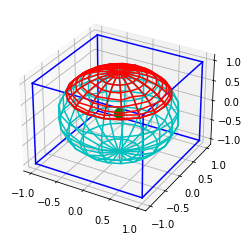

In [11]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_aspect("auto")

# draw cube
r = [-1, 1]
for s, e in combinations(np.array(list(product(r, r, r))), 2):
    if np.sum(np.abs(s-e)) == r[1]-r[0]:
        ax.plot3D(*zip(s, e), color="b")

# draw sphere of initial states
x_i = [0]*P*T
y_i = [0]*P*T
z_i = [0]*P*T
for i in range(len(Zero_Amplitude)):
    Theta_i = 2*np.arccos(Zero_Amplitude[i])
    Phase_i = Phase[i % P]
    x_i[i] = np.sin(Theta_i)*np.cos(Phase_i)
    y_i[i] = np.sin(Theta_i)*np.sin(Phase_i)
    z_i[i] = np.cos(Theta_i)
# Reshaping matrices X, Y and Z in right dimensions to be represented
x_i = np.reshape(x_i, (T, P))
y_i = np.reshape(y_i, (T, P))
z_i = np.reshape(z_i, (T, P))
ax.plot_wireframe(x_i, y_i, z_i, color="c")


# draw sphere of final states
x_i = [0]*P*T
y_i = [0]*P*T
z_i = [0]*P*T
for i in range(len(Zero_Amplitude)):
    Theta_i = 2*np.arccos(Zero_AmplitudeF[i])
    Phase_i = Phase[i % P]
    x_i[i] = np.sin(Theta_i)*np.cos(Phase_i)
    y_i[i] = np.sin(Theta_i)*np.sin(Phase_i)
    z_i[i] = np.cos(Theta_i)
# Reshaping matrices X, Y and Z in right dimensions to be represented
x_i = np.reshape(x_i, (T, P))
y_i = np.reshape(y_i, (T, P))
z_i = np.reshape(z_i, (T, P))
ax.plot_wireframe(x_i, y_i, z_i, color="r")

# draw center
ax.scatter([0], [0], [0], color="g", s=100)

plt.show()